<a href="https://colab.research.google.com/github/Ravi110296/Google-colab-projects/blob/main/Mnist_Keras_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
(xtrain,ytrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
ytrain = np.array(pd.get_dummies(ytrain))

In [ ]:
ytrain.shape

(60000, 10)

In [ ]:
!pip install -q keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner.engine.hyperparameters as hp
from keras_tuner import RandomSearch

In [ ]:
def get_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input((28,28),name = 'Input'))
  model.add(tf.keras.layers.Conv1D(hp.Int('filters',32,128,16),3,1,'valid',activation = hp.Choice('act',['relu','softmax'])))
  model.add(tf.keras.layers.MaxPool1D(hp.Choice('pool',[1,2]),strides = 2))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(hp.Int('filters',min_value = 32,max_value = 128,step = 16),'relu'))
  model.add(tf.keras.layers.Dense(10,'softmax'))

  model.compile(hp.Choice('optimizers',['adam','rmsprop']),'categorical_crossentropy',['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(get_model,'val_accuracy',max_trials = 5,directory = 'output',overwrite = True,project_name = 'Fashion_MNIST')

In [ ]:
tuner.search(xtrain,ytrain,epochs = 3,validation_split = 0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.8379999995231628

Best val_accuracy So Far: 0.8583333492279053
Total elapsed time: 00h 03m 31s


In [ ]:
model = tuner.get_best_models()[0]

In [ ]:
model.fit(xtrain,ytrain,32,epochs = 10,validation_split = 0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3594 - accuracy: 0.8696 - val_loss: 0.3828 - val_accuracy: 0.8645
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3364 - accuracy: 0.8777 - val_loss: 0.3760 - val_accuracy: 0.8672
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3231 - accuracy: 0.8814 - val_loss: 0.4112 - val_accuracy: 0.8603
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3135 - accuracy: 0.8847 - val_loss: 0.3884 - val_accuracy: 0.8698
Epoch 8/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3008 - accuracy: 0.8894 - val_loss: 0.3610 - val_accuracy: 0.8752
Epoch 9/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2862 - accuracy: 0.8953 - val_loss: 0.3805 - val_accuracy: 0.8698
Epoch 10/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2895 - accuracy: 0.8954 - val_loss: 0.4163 - val_a

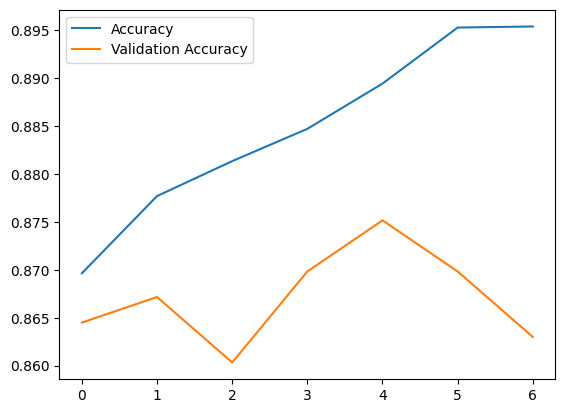

In [ ]:
plt.plot(model.history.history['accuracy'],label = 'Accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()

In [ ]:
ypred_1 = []
temp = model.predict(xtest)
for i in tqdm(temp):
  temp_1 = np.argmax(i)
  ypred_1.append(temp_1)
ypred_1 = np.array(ypred_1)

313/313 [==============================] - 1s 3ms/step


  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
ypred_1

array([9, 2, 1, ..., 8, 1, 5])

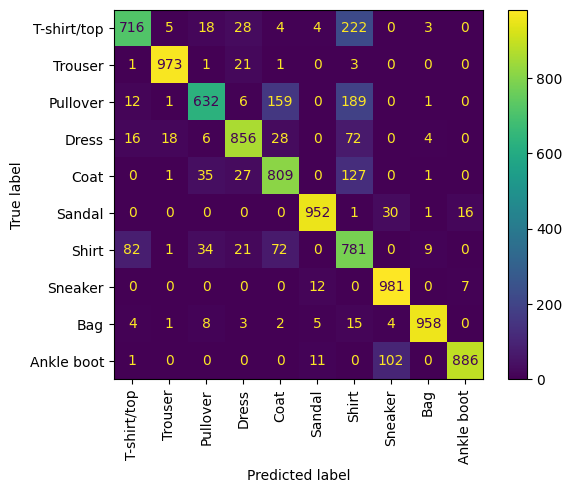

In [ ]:
cm = confusion_matrix(ytest,ypred_1)
ConfusionMatrixDisplay(cm,display_labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']).plot()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
print(classification_report(ytest,ypred_1,target_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.72      0.78      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.86      0.63      0.73      1000
       Dress       0.89      0.86      0.87      1000
        Coat       0.75      0.81      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.55      0.78      0.65      1000
     Sneaker       0.88      0.98      0.93      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.89      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.87      0.85      0.86     10000

